In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import time
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.image as mpimg
from scipy.ndimage import filters
import urllib
from numpy import random
import sys
import pickle
import os
from scipy.io import loadmat
# Load the MNIST digit data
M = loadmat("mnist_all.mat")

In [2]:
def softmax(y):
    '''Return the output of the softmax function for the matrix of output y. y
    is an NxM matrix where N is the number of outputs for a single case, and M
    is the number of cases'''
    return exp(y) / tile(sum(exp(y), 0), (len(y), 1))

In [3]:
def tanh_layer(y, W, b):
    '''Return the output of a tanh layer for the input matrix y. y
    is an NxM matrix where N is the number of inputs for a single case, and M
    is the number of cases'''
    return tanh(dot(W.T, y) + b)

In [4]:
def forward(x, W0, b0, W1, b1):
    L0 = tanh_layer(x, W0, b0)
    L1 = dot(W1.T, L0) + b1
    output = softmax(L1)
    return L0, L1, output

In [5]:
def cost_function(y, p):
    return -np.sum(y * np.log(p))

In [ ]:
def part2(x, W0, b0):
    total_W0 = np.concatenate((b0, W0))
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    vals = softmax(np.dot(total_W0.T, total_x))
    return vals.T

def part3(x, y1, p):
    deriv = np.subtract(p, y1)
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    deriv = np.matmul(deriv.T, total_x.T).T
    return deriv  # shape 10, 785

In [7]:
def get_data(M):
    train_keys = [key for key in M.keys() if "train" in key]
    data_length = 0
    for train_k in train_keys:
        data_length += M[train_k].shape[0]

    # concatenate all the data
    train_data = np.zeros((data_length, 784))
    data_counter = 0
    data_size = 0

    train_y = np.zeros((data_length, 10))
    for i, train_k in enumerate(train_keys):
        data_size = M[train_k].shape[0]
        print(i, data_size)
        train_data[data_counter: data_counter + data_size, :] = M[train_k]
        train_y[data_counter: data_counter + data_size, i] = 1
        data_counter += data_size
    return train_data, train_y


def df(x, W0, y):
    # this W0 is assumed to have the bias incorperated into it
    #print(W0.shape, y.shape)
    W1, b0 = W0[:-1, :].reshape(784, W0.shape[1]), W0[-1, :].reshape(1, 10)
    vals = part2(x, W1, b0)
    return part3(x, y, vals)


def grad_descent(df, x, y, W0, b0, alpha, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    start = time.time()
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 1000
    iter = 0
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        W1 -= alpha * df(x, W1, y)
        if iter % 100 == 0:
            print("Iter", iter)
            # print "x = (%.3f, %.3f, %.3f), f(x) = %.3f" % (t[0], t[1], t[2], f(x, y, t))
            # print "Gradient: ", df(x, y, t), "\n"
        iter += 1
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1


def part4(data, W0, b0, y):
    np.random.seed(0)
    alpha = 0.005
    final_weights = grad_descent(df, data, y, W0, b0, alpha, 1e-4)
    return final_weights


def deriv_multilayer(W0, b0, W1, b1, x, L0, L1, y, y_):
    '''Incomplete function for computing the gradient of the cross-entropy
    cost function w.r.t the parameters of a neural network'''
    p_i = part2(W0, b0, weights)  # the probabilities for each data for each class
    derivative = -(W1.T - p_i)
    d_W = np.matmul(derivative, W0)
    dCdL1 = y - y_
    dCdW1 = dot(L0, dCdL1.T)

In [8]:
# PART ONE DATA SNIPPIT
# Load sample weights for the multilayer neural network
snapshot = pickle.load(open("snapshot50.pkl", "rb"), encoding="latin-1")
W0 = snapshot["W0"]  # data
b0 = snapshot["b0"].reshape((300, 1))  # bias?
W1 = snapshot["W1"]  # should be likelihoods?
b1 = snapshot["b1"].reshape((10, 1))  # classes?
#print(W0.shape)

np.random.seed(0)
weights = np.random.random(size=784*10).reshape((784, 10))/10.
weights_bias = np.zeros(10).reshape(1, 10)
#np.random.random(size=10).reshape((1, 10))

# PART TWO - SINGLE LAYER NN
x = M["train5"][148:149].T
x = x / 255.
output = part2(x, weights, weights_bias)
# print(output)

# PART TWO - SINGLE LAYER NN
x = M["train5"][148:149].T / 255./ 255.
output = part2(x, weights, weights_bias)
y = np.zeros((10, 1))
y[5, 0] = 1.

# PART THREE _ FINITE DIFFS
cost = cost_function(y, output)

h = 0.0001
'''
for i in range(5):
    place = 215 + i
    weights2 = weights.copy()
    weights2[place, 5] += h
    output2 = part2(x, weights2, weights_bias)
    cost2 = cost_function(y, output2)
    print("Finite Diff", (cost2 - cost) / h)
    real_diff = part3(x, y, output)
    print("Real Diff", real_diff[place + 1, 5])
    # print(real_diff.shape)
'''

'\nfor i in range(5):\n    place = 215 + i\n    weights2 = weights.copy()\n    weights2[place, 5] += h\n    output2 = part2(x, weights2, weights_bias)\n    cost2 = cost_function(y, output2)\n    print("Finite Diff", (cost2 - cost) / h)\n    real_diff = part3(x, y, output)\n    print("Real Diff", real_diff[place + 1, 5])\n    # print(real_diff.shape)\n'

In [9]:
##PART FOUR##
trainX, trainY = get_data(M)
print(np.where(trainX==np.nan))
trainX = trainX.T/255. /255.
print("TrainX", trainX.shape)
final_weights = part4(trainX, weights, weights_bias, trainY)
#grad_descent(df, trainX, trainY, weights, weights_bias, 0.01)
# L0, L1, output = forward(x, W0, b0, W1, b1)
# get the index at which the output is the largest
# y = argmax(output)

################################################################################
# Code for displaying a feature from the weight matrix mW
# fig = figure(1)
# ax = fig.gca()
# heatmap = ax.imshow(mW[:,50].reshape((28,28)), cmap = cm.coolwarm)
# fig.colorbar(heatmap, shrink = 0.5, aspect=5)
# show()
################################################################################

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949
(array([], dtype=int64), array([], dtype=int64))
TrainX (784, 60000)
[[ 0.05488135  0.07151894  0.06027634 ...,  0.0891773   0.09636628
   0.03834415]
 [ 0.0791725   0.05288949  0.05680446 ...,  0.08326198  0.07781568
   0.08700121]
 [ 0.09786183  0.07991586  0.04614794 ...,  0.09446689  0.05218483
   0.04146619]
 ..., 
 [ 0.00869201  0.06454565  0.03946523 ...,  0.01750788  0.01853182
   0.0598919 ]
 [ 0.03345442  0.09068548  0.00793563 ...,  0.05302586  0.06983474
   0.05457063]
 [ 0.09224717  0.05516776  0.09196657 ...,  0.03425546  0.0899374
   0.01492148]]
Iter 0
Iter 100
Iter 200
Iter 300
Iter 400
Iter 500
Iter 600
Iter 700
Iter 800
Iter 900
Iter 1000
Time taken: 375.97908186912537
(array([], dtype=int64), array([], dtype=int64))


(785, 10)


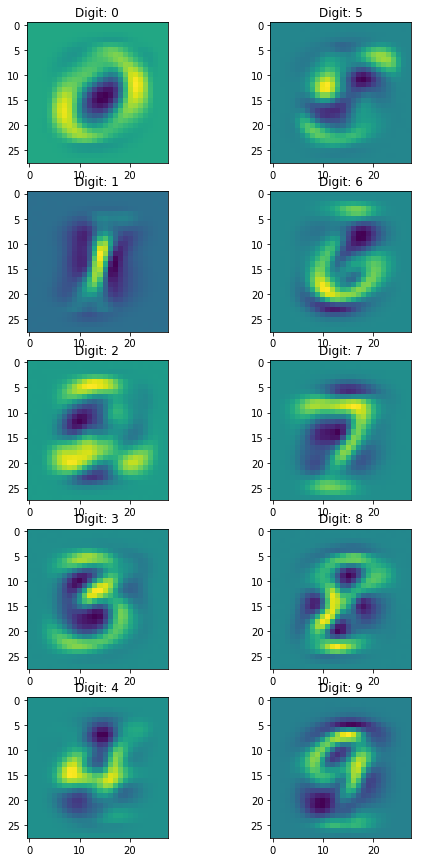

In [39]:
print(final_weights.shape)
#discard the last element, as that is the bias term
fig , ax= plt.subplots(5, 2, figsize=(8,15))
for i in range(10):
    #print(i//5, i%5)
    ax[i%5, i//5].imshow(final_weights[1:, i].reshape(28, 28))
    ax[i%5, i//5].set_title("Digit: {0}".format(i))
    # .title("Number {0}".format(i))
plt.show()
#rint(final_weights[:-1, 7])
#plt.imshow(final_weights[:-1, 7].reshape(28, 28))
#plt.show()

In [11]:
#plot learning curves
#collect testing data
def get_test_data(M):
    train_keys = [key for key in M.keys() if "test" in key]
    data_length = 0
    for train_k in train_keys:
        data_length += M[train_k].shape[0]

    # concatenate all the data
    train_data = np.zeros((data_length, 784))
    print(data_length)
    data_counter = 0
    data_size = 0

    train_y = np.zeros((data_length, 10))
    for i, train_k in enumerate(train_keys):
        data_size = M[train_k].shape[0]
        print(i, data_size)
        train_data[data_counter: data_counter + data_size, :] = M[train_k]
        train_y[data_counter: data_counter + data_size, i] = 1
        data_counter += data_size
    return train_data, train_y

testX, testY = get_test_data(M)

10000
0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009


In [18]:
added_ones = np.ones((testX.shape[0], 1))
#print(testX.shape, added_ones.T.shape)
#totaltestX = np.vstack((testX, ))
totaltestX = np.concatenate((testX,added_ones), axis=1)
#print(totaltestX.shape)
#print (final_weights.shape, totaltestX.shape)
preds = np.matmul(totaltestX, final_weights)

preds_max =  preds.max(axis = 1)
final_preds = np.isin(preds, preds_max).astype(int)
#how many of the hot keys match for validation
print(len(np.where((testY == final_preds).all(axis =1)==True)[0]))

(10000, 784) (1, 10000)
(10000, 785)
(785, 10) (10000, 785)
8213


Plot the learning curves with these set of parameters every 400 iterations, see how the performance changes

In [92]:
def grad_descent_learning_curves(df, x, y, W0, b0, alpha, testX, testY, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    start = time.time()
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 6500
    iter = 0
    performance_test = np.zeros(max_iter//100 +1) #check performance every 100 iterations
    performance_train = np.zeros_like(performance_test)

    added_ones = np.ones((testX.shape[0], 1))
    totaltestX = np.concatenate((testX,added_ones), axis=1)
    
    added_ones = np.ones((x.shape[1], 1))
    totaltrainX = np.concatenate((x.T, added_ones), axis = 1)
    
    counter = 0
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        W1 -= alpha * df(x, W1, y)
        if iter % 100 == 99:
            print("Iter", iter)
            
            preds = np.matmul(totaltrainX, W1)
            preds_max =  preds.max(axis = 1)
            final_preds = np.isin(preds, preds_max).astype(int)
            #how many of the hot keys match for validation
            performance_train[counter] =  len(np.where((trainY == final_preds).all(axis =1)==True)[0])/60000.
            
            preds = np.matmul(totaltestX, W1)
            preds_max =  preds.max(axis = 1)
            final_preds = np.isin(preds, preds_max).astype(int)
            #how many of the hot keys match for validation
            performance_test[counter] = len(np.where((testY == final_preds).all(axis =1)==True)[0])  /10000.
            
            #counter +=1
            print(performance_train[counter], performance_test[counter])
            counter +=1
        iter += 1
        
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, performance_train, performance_test


def part4b(data, W0, b0, y, testX, testY):
    np.random.seed(0)
    alpha = 0.01
    final_weights, performance_train, performance_test = grad_descent_learning_curves(df, data, y, W0, b0, alpha, testX, testY, 1e-4)
    return final_weights, performance_train, performance_test



In [93]:
final_weights, performance_train, performance_test = part4b(trainX, weights, weights_bias, trainY, testX, testY)

Iter 99
0.740533333333 0.7402
Iter 199
0.77355 0.7791
Iter 299
0.791483333333 0.7968
Iter 399
0.803916666667 0.8101
Iter 499
0.813266666667 0.8213
Iter 599
0.820616666667 0.8286
Iter 699
0.826783333333 0.8339
Iter 799
0.83255 0.8398
Iter 899
0.83705 0.8438
Iter 999
0.84065 0.8465
Iter 1099
0.843633333333 0.8506
Iter 1199
0.846983333333 0.8543
Iter 1299
0.849466666667 0.857
Iter 1399
0.8518 0.8589
Iter 1499
0.854116666667 0.8609
Iter 1599
0.856116666667 0.8622
Iter 1699
0.857983333333 0.865
Iter 1799
0.859966666667 0.8669
Iter 1899
0.861533333333 0.8679
Iter 1999
0.86305 0.8699
Iter 2099
0.86405 0.8706
Iter 2199
0.86535 0.8712
Iter 2299
0.86645 0.8729
Iter 2399
0.86745 0.8738
Iter 2499
0.868366666667 0.8746
Iter 2599
0.8692 0.8753
Iter 2699
0.870033333333 0.8764
Iter 2799
0.870966666667 0.8771
Iter 2899
0.871716666667 0.8781
Iter 2999
0.8725 0.8794
Iter 3099
0.87335 0.8804
Iter 3199
0.874233333333 0.8815
Iter 3299
0.875133333333 0.8821
Iter 3399
0.875933333333 0.8822
Iter 3499
0.87665 0

In [94]:
performance_train, performance_test

(array([ 0.74053333,  0.77355   ,  0.79148333,  0.80391667,  0.81326667,
         0.82061667,  0.82678333,  0.83255   ,  0.83705   ,  0.84065   ,
         0.84363333,  0.84698333,  0.84946667,  0.8518    ,  0.85411667,
         0.85611667,  0.85798333,  0.85996667,  0.86153333,  0.86305   ,
         0.86405   ,  0.86535   ,  0.86645   ,  0.86745   ,  0.86836667,
         0.8692    ,  0.87003333,  0.87096667,  0.87171667,  0.8725    ,
         0.87335   ,  0.87423333,  0.87513333,  0.87593333,  0.87665   ,
         0.87718333,  0.87761667,  0.87818333,  0.87875   ,  0.87938333,
         0.8799    ,  0.88076667,  0.88121667,  0.88163333,  0.88213333,
         0.88275   ,  0.88301667,  0.88343333,  0.88376667,  0.88423333,
         0.8846    ,  0.88503333,  0.88525   ,  0.88556667,  0.886     ,
         0.88623333,  0.88663333,  0.88693333,  0.8873    ,  0.88751667,
         0.88783333,  0.88831667,  0.88861667,  0.88883333,  0.88906667,  0.        ]),
 array([ 0.7402,  0.7791,  0.7968,  

In [80]:
#performance_train, performance_test

(array([ 0.7134    ,  0.74063333,  0.76021667,  0.7736    ,  0.7837    ,
         0.79158333,  0.79826667,  0.80395   ,  0.80911667,  0.81328333,
         0.81688333,  0.8206    ,  0.82371667,  0.8268    ,  0.83011667,
         0.83255   ,  0.8348    ,  0.83705   ,  0.83906667,  0.84063333,
         0.84221667,  0.84363333,  0.84538333,  0.84698333,  0.84828333,
         0.84946667,  0.85071667,  0.85178333,  0.85313333,  0.85411667,
         0.85503333,  0.85611667,  0.85725   ,  0.858     ,  0.85886667,  0.        ]),
 array([ 0.7143,  0.7402,  0.7635,  0.7791,  0.7889,  0.7968,  0.804 ,
         0.8102,  0.8163,  0.8213,  0.8257,  0.8286,  0.8322,  0.8339,
         0.8369,  0.8398,  0.8419,  0.8438,  0.8451,  0.8465,  0.8489,
         0.8506,  0.8525,  0.8543,  0.8556,  0.857 ,  0.8579,  0.8589,
         0.8598,  0.8609,  0.8617,  0.8622,  0.8635,  0.8649,  0.8657,  0.    ]))

In [95]:
iterations =  np.arange(6500//100 )*100
iterations

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400,
       5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400])

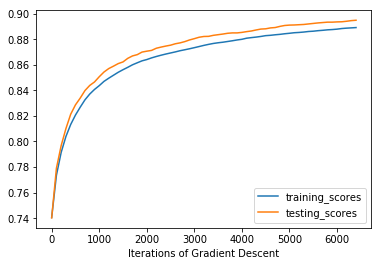

In [96]:
plt.plot(iterations, performance_train[:-1], label = "training_scores")
plt.plot(iterations, performance_test[:-1], label = "testing_scores")
plt.xlabel("Iterations of Gradient Descent")
plt.legend()
plt.show()

In [ ]:
#part 5, gradient descent with momentum